In [56]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms

import numpy as np

In [2]:
t1 = torch.rand(2,3,5)

In [3]:
t1

tensor([[[0.0781, 0.4798, 0.9925, 0.5414, 0.4317],
         [0.5405, 0.8520, 0.8017, 0.8864, 0.7525],
         [0.1562, 0.5724, 0.0846, 0.9453, 0.7667]],

        [[0.4402, 0.6662, 0.1796, 0.7348, 0.1718],
         [0.7573, 0.4123, 0.1746, 0.0933, 0.3600],
         [0.2803, 0.0874, 0.6032, 0.3790, 0.4312]]])

In [4]:
x = torch.tensor([2,3])

In [5]:
y= x.new_ones(5,3)
x = torch.rand(5,3)
x+y

tensor([[1.3443, 1.5723, 1.1682],
        [1.6708, 1.5868, 1.0576],
        [1.4401, 1.5957, 1.3297],
        [1.8725, 1.9292, 1.9362],
        [1.0244, 1.5414, 1.4781]])

In [6]:
torch.add(x,y) == x+y 

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [7]:
x.add_(y)

tensor([[1.3443, 1.5723, 1.1682],
        [1.6708, 1.5868, 1.0576],
        [1.4401, 1.5957, 1.3297],
        [1.8725, 1.9292, 1.9362],
        [1.0244, 1.5414, 1.4781]])

In [8]:
x.view(15)

tensor([1.3443, 1.5723, 1.1682, 1.6708, 1.5868, 1.0576, 1.4401, 1.5957, 1.3297,
        1.8725, 1.9292, 1.9362, 1.0244, 1.5414, 1.4781])

In [9]:
x.reshape(3,-1)

tensor([[1.3443, 1.5723, 1.1682, 1.6708, 1.5868],
        [1.0576, 1.4401, 1.5957, 1.3297, 1.8725],
        [1.9292, 1.9362, 1.0244, 1.5414, 1.4781]])

In [10]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [11]:
y = 3*x + 7
print(y)

tensor([[10., 10.],
        [10., 10.]], grad_fn=<AddBackward0>)


In [12]:
z = 2*y**2
w = z.mean()

print(z, w)

tensor([[200., 200.],
        [200., 200.]], grad_fn=<MulBackward0>) tensor(200., grad_fn=<MeanBackward0>)


In [13]:
w.backward()

In [14]:
x.grad

tensor([[30., 30.],
        [30., 30.]])

In [15]:
z.grad

In [16]:
y.grad

In [17]:
n=1000

In [18]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.5748,  1.0000],
        [ 0.3403,  1.0000],
        [-0.9965,  1.0000],
        [-0.7879,  1.0000],
        [-0.6027,  1.0000]])

In [19]:
a = torch.tensor([3.,2]); a

tensor([3., 2.])

In [20]:
y = x@a + torch.randn(n)/3

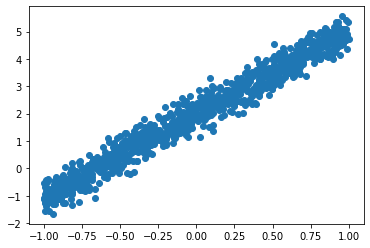

In [21]:
plt.scatter(x[:,0], y)

In [22]:
def mse(y, y_pred): 
    return ((y - y_pred)**2).mean()

In [23]:
theta = (torch.t(x)@x) .inverse() @ torch.t(x) @ y

In [24]:
theta

tensor([3.0425, 1.9952])

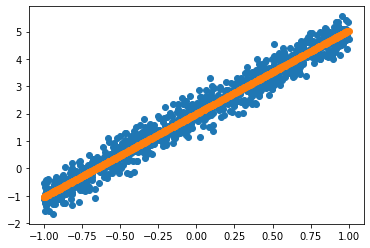

In [25]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@theta)

In [26]:
a_guess = nn.Parameter(torch.tensor([-1.,1]))

In [27]:
lr = 1e-1
for t in range(50): 
    y_hat = x@a_guess
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a_guess.sub_(lr * a_guess.grad)
        a_guess.grad.zero_()

tensor(6.8571, grad_fn=<MeanBackward0>)
tensor(1.4578, grad_fn=<MeanBackward0>)
tensor(0.4153, grad_fn=<MeanBackward0>)
tensor(0.1807, grad_fn=<MeanBackward0>)
tensor(0.1275, grad_fn=<MeanBackward0>)


In [28]:
print(a_guess)

Parameter containing:
tensor([2.9429, 1.9936], requires_grad=True)


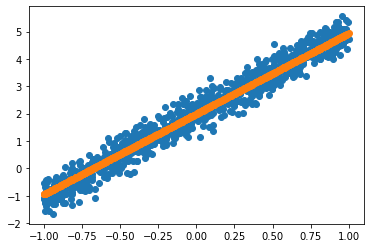

In [29]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a_guess.detach())

In [30]:
4*torch.rand(2)

tensor([1.4518, 1.3649])

In [33]:
num_samples = 10_000
x= []
for num in range(1, num_samples+1):
    x.append(4*torch.rand(2))

In [48]:
def run_model(model):
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.MSELoss()
    
    total_loss = []
    

    for num in range(1, num_samples+1):
        # Progress bar indicator
        if num % (num_samples//5) == 0:
            print('{0}: %: {1:.3f}'.format(num,num/num_samples * 100))
            
        # data prep
        
        data, target = Variable(x[num-1]), Variable(x[num-1][0] + x[num-1][1])
        
        # Feed forward through NN
        output = model(data)
        loss = criterion(output, target)
        total_loss.append(loss)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return total_loss

In [51]:
def plot(total_loss):
    fig,ax=plt.subplots(figsize=(11,8))
    ax.plot(total_loss,marker='.',ls='',markersize=1.)
    ax.set_ylim(0,)
    ax.set_xlim(0,)
    ax.grid(alpha=0.2)
    ax.set_xlabel('training examples')
    ax.set_ylabel('mean squared loss')

2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


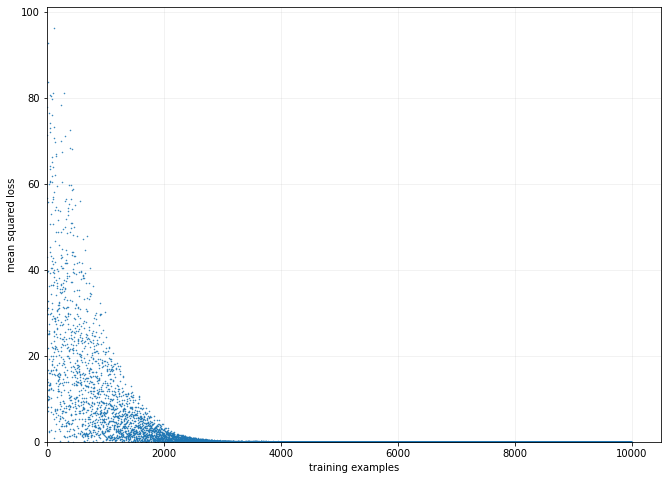

In [52]:
model = nn.Sequential(
    nn.Linear(2, 1, bias=False))
total_loss =run_model(model)
plot(total_loss)

2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


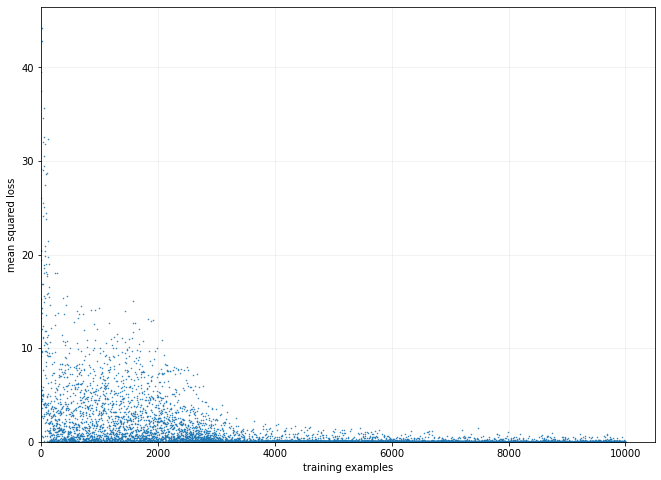

In [53]:
model = nn.Sequential(
            nn.Linear(2, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 1))

total_loss =run_model(model)
plot(total_loss)

2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


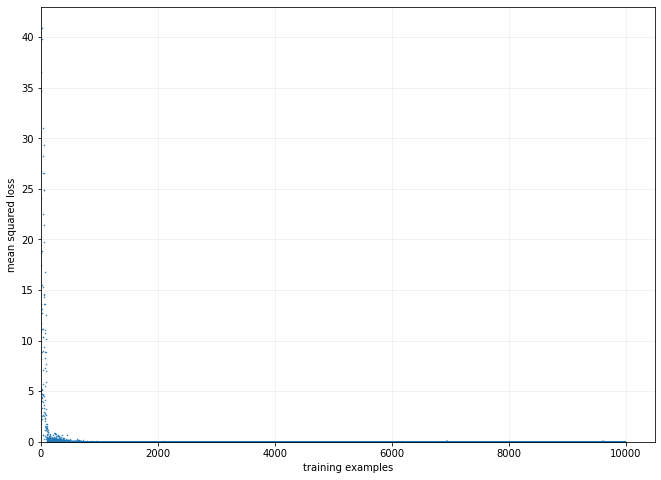

In [54]:
model = nn.Sequential(
            nn.Linear(2, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1))

total_loss =run_model(model)
plot(total_loss)

In [61]:
x,y = np.linspace(-5,8,100),[]

In [63]:
for xx in x:
    y.append(model(torch.tensor([xx,2],dtype=torch.float32)).data.cpu().numpy()[0])

In [70]:
y[99]

9.827751

In [69]:
x[99]+2

10.0